In [2]:
#!/usr/bin/env python3
# EE4070 Numerical Analysis
# HW06 Conjugate Gradient Method
# 110071021, 吳睿芸
# Date: 2024/04/15

import numpy as np
import time
from ee4070 import *

def Radd(A, rp, rn, g):
	''' Add resistor with conductance g to circuit matrix A
        rp: positive node; rn: negative node '''
	A[rp, rp] += g
	A[rn, rn] += g
	A[rp, rn] -= g
	A[rn, rp] -= g

def Vsrc(n, A, b, vp, V):
	''' Add grounded votage source to circuit matrix A and RHS b
        vp: positive node for the voltage source
        V: voltage value
		This creates a asymmetric matrix'''
	for i in range(n):
		A[vp, i] = 0
	A[vp, vp] = 1
	b[vp] = V

def VsrcSym(n, A, b, vp, V):
	''' Add grounded votage source to circuit matrix A and RHS b
        vp: positive node for the voltage source
        V: voltage value
		This creates a symmetric matrix'''
	Vsrc(n, A, b, vp, V)
	for i in range(n):
		if A[i, vp] != 0 and i != vp:
			b[i] -= A[i, vp] * V
			A[i, vp] = 0

def Mat(n):
    ''' create simple resistor network system matrix'''
    for i in range(n): # n nodes in system
        rn = i
        ''' every node connect to the node on the right side
            except for the nodes on the last column '''
        if (rn + 1) <= (n - n_perside):
            rp = rn + n_perside # find the node on the right side
            Radd(A, rp, rn, g)  # Add resistor
        
        ''' every node connect to the node below it
            except for the nodes on the last row '''
        if (i + 1) % n_perside != 0:
            rp = rn + 1        # find the node below it
            Radd(A, rp, rn, g) # Add resistor

    # set grounded and grounded votage source to 0 and V
    grounded(n_perside, n) 

def grounded(n_perside, n):
    ''' grounded 
        and grounded votage source '''
    # grounded at node (n_perside + n)/ 2
    # count from zero , so minus 1
    vp = int ( (n_perside + n)/ 2 - 1)
    for i in range(n):
        A[vp, i] = 0
    A[vp, vp] = 1

    # grounded votage source is at node 1
    vp = 0      # count from zero, 1 - 1
    VsrcSym(n, A, b, vp, V)

def get_Vw(N, x):
    # Vw is node number N/2 + 1
    w = (N/2 + 1) - 1       # count from zero, minus 1
    Vw = x[int(w)]          # Vw is x[(N/2 - 1) - 1]
    Vw = round(Vw, 6)       # Round to the sixth decimal place
    return Vw

def get_Vne(N, x): 
    # Vne is node number n - N
    ne = n - N - 1          # count from zero, minus 1
    Vne = x[int(ne)]        # Vne is x[n - N - 1]
    Vne = round(Vne, 6)     # Round to the sixth decimal place
    return Vne

def get_Vne(N, x):
    # Vne is node number n - N/2
    e = n - N/2 - 1         # count from zero, minus 1
    Ve = x[int(e)]          # Ve is x[n - N/2 - 1]
    Ve = round(Ve, 6)       # Round to the sixth decimal place
    return Ve

# read str for Number of resistors per side
str = input('Number of resistors per side :')
N = int(str)         # Number of resistors per side
print('N = ', N)     # print N
n = (N + 1) ** 2     # n : total amount of nodes
n_perside = N + 1    # n_perside: total amount of nodes perside
g = 1 / (2000 / N)   # resistant = 2000 / N, convert to g
V = 1                # the voltage V is 1 volt


# calculate CPU time of solving LU decomposition
A = np.zeros((n, n), dtype=float)  # create an nxn zero matrix A
b = np.zeros(n, dtype=float)   # create an nx1 zero vector b
Mat(n)
t0 = time.time()     # record time to t0
A = luFact(n, A)     # LU decomposition
y = fwdSubs(n, A, b) # forward substitution   Ly = b
x_LU = bckSubs(n, A, y) # backward substitution  Ux = y
t0 = (time.time() - t0)    # calculate CPU time
print('LU Decomposition CPU time = {:g} seconds'.format(t0)) # print out CPU time

# calculate CPU time of Conjugate Gradient Method
A = np.zeros((n, n), dtype=float) # create an nxn zero matrix A
b = np.zeros(n, dtype=float)      # create an nx1 zero vector b
Mat(n)
t0 = time.time()                  # record time to t0
x_CG = CG(n, A, b)                # Conjugate Gradient Method
# print(x_CG)
t0 = (time.time() - t0)           # calculate CPU time

print('CG CPU time = {:g} seconds'.format(t0)) # print out CPU time
print("accuracy of LU: ", norm2( A @ x_LU - b) )
print("accuracy of CG: ", norm2( A @ x_LU - b) )
# print('accuracy of CG vs. LU: ', abs(get_Vw(N, x_LU) - get_Vw(N,x_CG[2])))

Number of resistors per side : 3


N =  3
LU Decomposition CPU time = 0.000973463 seconds
CG CPU time = 0 seconds
accuracy of CG vs. LU:  1.733557349850833e-15


In [10]:
import numpy as np
import time
from ee4070 import *

def Radd(A, rp, rn, g):
	''' Add resistor with conductance g to circuit matrix A
        rp: positive node; rn: negative node '''
	A[rp, rp] += g
	A[rn, rn] += g
	A[rp, rn] -= g
	A[rn, rp] -= g

def Vsrc(n, A, b, vp, V):
	''' Add grounded votage source to circuit matrix A and RHS b
        vp: positive node for the voltage source
        V: voltage value
		This creates a asymmetric matrix'''
	for i in range(n):
		A[vp, i] = 0
	A[vp, vp] = 1
	b[vp] = V

def VsrcSym(n, A, b, vp, V):
	''' Add grounded votage source to circuit matrix A and RHS b
        vp: positive node for the voltage source
        V: voltage value
		This creates a symmetric matrix'''
	Vsrc(n, A, b, vp, V)
	for i in range(n):
		if A[i, vp] != 0 and i != vp:
			b[i] -= A[i, vp] * V
			A[i, vp] = 0

def Mat(n):
    ''' create simple resistor network system matrix'''
    for i in range(n): # n nodes in system
        rn = i
        ''' every node connect to the node on the right side
            except for the nodes on the last column '''
        if (rn + 1) <= (n - n_perside):
            rp = rn + n_perside # find the node on the right side
            Radd(A, rp, rn, g)  # Add resistor
        
        ''' every node connect to the node below it
            except for the nodes on the last row '''
        if (i + 1) % n_perside != 0:
            rp = rn + 1        # find the node below it
            Radd(A, rp, rn, g) # Add resistor

    # set grounded and grounded votage source to 0 and V
    grounded(n_perside, n) 

def grounded(n_perside, n):
    ''' grounded 
        and grounded votage source '''
    # grounded at node (n_perside + n)/ 2
    # count from zero , so minus 1
    vp = int ( (n_perside + n)/ 2 - 1)
    for i in range(n):
        A[vp, i] = 0
    A[vp, vp] = 1

    # grounded votage source is at node 1
    vp = 0      # count from zero, 1 - 1
    VsrcSym(n, A, b, vp, V)

def get_Vw(N, x):
    # Vw is node number N/2 + 1
    w = (N/2 + 1) - 1       # count from zero, minus 1
    Vw = x[int(w)]          # Vw is x[(N/2 - 1) - 1]
    Vw = round(Vw, 6)       # Round to the sixth decimal place
    return Vw

def get_Vne(N, x): 
    # Vne is node number n - N
    ne = n - N - 1          # count from zero, minus 1
    Vne = x[int(ne)]        # Vne is x[n - N - 1]
    Vne = round(Vne, 6)     # Round to the sixth decimal place
    return Vne

def get_Vne(N, x):
    # Vne is node number n - N/2
    e = n - N/2 - 1         # count from zero, minus 1
    Ve = x[int(e)]          # Ve is x[n - N/2 - 1]
    Ve = round(Ve, 6)       # Round to the sixth decimal place
    return Ve

# list = [2, 4, 10, 20, 40, 50, 60, 80, 100]
listx =["50"]
for i in range(len(listx)):
    # read str for Number of resistors per side
    str = listx[i]
    N = int(str)         # Number of resistors per side
    print('N = ', N)     # print N
    n = (N + 1) ** 2     # n : total amount of nodes
    n_perside = N + 1    # n_perside: total amount of nodes perside
    g = 1 / (2000 / N)   # resistant = 2000 / N, convert to g
    V = 1                # the voltage V is 1 volt
    
    
    # calculate CPU time of solving LU decomposition
    A = np.zeros((n, n), dtype=float)  # create an nxn zero matrix A
    b = np.zeros(n, dtype=float)   # create an nx1 zero vector b
    Mat(n)
    t0 = time.time()     # record time to t0
    A = luFact(n, A)     # LU decomposition
    y = fwdSubs(n, A, b) # forward substitution   Ly = b
    x_LU = bckSubs(n, A, y) # backward substitution  Ux = y
    t0 = (time.time() - t0)    # calculate CPU time
    print('LU Decomposition CPU time = {:g} seconds'.format(t0)) # print out CPU time
    
    # calculate CPU time of Conjugate Gradient Method
    A = np.zeros((n, n), dtype=float) # create an nxn zero matrix A
    b = np.zeros(n, dtype=float)      # create an nx1 zero vector b
    Mat(n)
    t0 = time.time()                  # record time to t0
    x_CG = CG(n, A, b)                # Conjugate Gradient Method
    # print(x_CG)
    t0 = (time.time() - t0)           # calculate CPU time
    print('CG CPU time = {:g} seconds'.format(t0)) # print out CPU time
    
    print("accuracy of LU: ", norm2( A @ x_LU - b) )
    print("accuracy of CG: ", norm2( A @ x_LU - b) )

N =  50
LU Decomposition CPU time = 44.7243 seconds
CG CPU time = 2.0726 seconds
accuracy of CG vs. LU:  9.07340403442233e-06


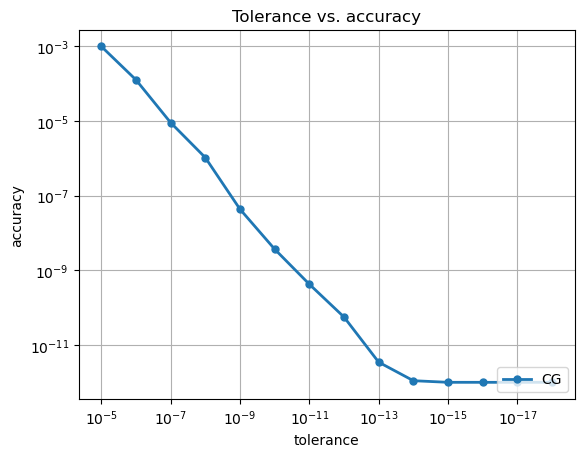

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # creating a plot
plt.xscale('log') # set x-axis log scale
plt.yscale('log') # set y-axis log scale
plt.grid(True) # set grid lines

# [x1, y1] is the data set for built-in multiplication CPU times
# [x1, z1] is the n^3 approximation line
x1 = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18]
CG = [0.0009962315784981942, 0.00012695756748303438, 9.07340403442233e-06, 1.0497464786487477e-06, 4.3634942483766015e-08
      , 3.710211245819366e-09, 4.2671373127075724e-10, 5.642714704745278e-11, 3.4915374214093697e-12, 1.114336478104337e-12
      , 1.0086720675361793e-12, 1.0082713937453716e-12, 1.0082713937453716e-12, 1.0082713937453716e-12]

# LU = [6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16
#      ,6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16
#      ,6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16, 6.888885120027331e-16]

# CG2 = []
# for i in range(14):
#     CG2.append( CG[i] - LU[i] )
# print(CG2)
# add curve 1 for built-in cpu time
# ax.plot(x1, CG, label='CG', lw=2.0, marker='.', markersize=10)
# ax.plot(x1, LU, label='LU', lw=2.0, marker='.', markersize=10)
ax.plot(x1, CG, label='CG', lw=2.0, marker='.', markersize=10)

# # [x1, z1] is the n^3 approximation line
# x1 = [ 80, 160, 320, 640, 1280, 2560, 5120]
# z1 = [ 3.05176e-06, 2.44141e-05, 0.000195313,0.0015625, 0.0125, 0.1, 0.8]
# ax.plot(x1, z1, label='$O(n^3)$', lw=2.0)

# # [x3, z3] is the n^2 approximation line
# x3 = [ 80, 160, 320, 640, 1280, 2560, 5120]
# z3 = [0.0005, 0.002, 0.008, 0.032, 0.128, 0.512, 2.048]
# ax.plot(x3, z3, label='$O(n^2)$', lw=2.0)


# add x-lable
ax.set_xlabel('tolerance')
# add y-lable
ax.set_ylabel('accuracy')
# add plot title
ax.set_title('Tolerance vs. accuracy')
# place legend
ax.legend(loc = 'lower right')
# show plot
plt.gca().invert_xaxis()
plt.show()

# save plot as an eps file
fig.savefig('mply-plot.eps')

### CPU time (s) for using CG and LU method in resistor networks

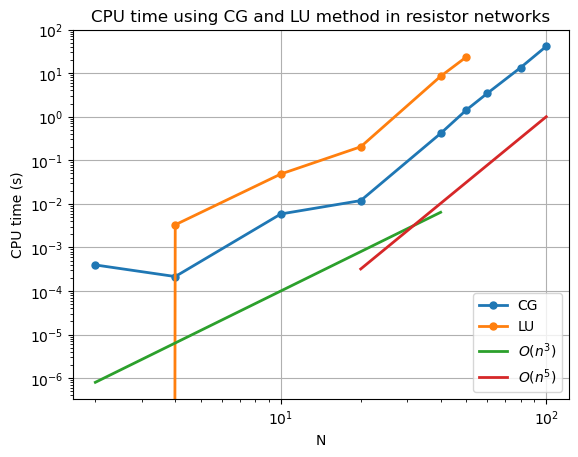

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # creating a plot
plt.xscale('log') # set x-axis log scale
plt.yscale('log') # set y-axis log scale
plt.grid(True) # set grid lines

# [x1, y1] is the data set for built-in multiplication CPU times
# [x1, z1] is the n^3 approximation line
x1 = [2, 4, 10, 20, 40, 50, 60, 80, 100]
CPU_time_CG = [0.000395775, 0.000214338, 0.00585794, 0.0118828, 0.414074, 1.42698, 3.45647, 13.3685, 41.2944]
x2 = [2, 4, 10, 20, 40, 50]
CPU_time_LU = [0, 0.00330544, 0.0484321, 0.204211, 8.47988, 23.5516]

# CG2 = []
# for i in range(14):
#     CG2.append( CG[i] - LU[i] )
# print(CG2)
# add curve 1 for built-in cpu time
# ax.plot(x1, CG, label='CG', lw=2.0, marker='.', markersize=10)
ax.plot(x1, CPU_time_CG, label='CG', lw=2.0, marker='.', markersize=10)
ax.plot(x2, CPU_time_LU, label='LU', lw=2.0, marker='.', markersize=10)

# # [x1, z1] is the n^3 approximation line
x3 = [2, 4, 10, 20, 40]
z1 = [ n**3 for n in x3 ]
z1_shifted = [val /10000000 for val in z1]
ax.plot(x3, z1_shifted, label='$O(n^3)$', lw=2.0)

# # [x1, z1] is the n^3 approximation line
x3 = [20, 40, 50, 60, 80, 100]
z1 = [ n**5 for n in x3 ]
z1_shifted = [val /10000000000 for val in z1]
ax.plot(x3, z1_shifted, label='$O(n^5)$', lw=2.0)
# # # [x1, z1] is the n^3 approximation line
# x4 = [2, 4, 10, 20, 40, 50, 60]
# z2 = [ s**3 for s in x4 ]
# z2_shifted = [val /1000000 for val in z1]
# ax.plot(x4, z1_shifted, label='$O(n^3)$', lw=2.0)

# # [x3, z3] is the n^2 approximation line
# x3 = [ 80, 160, 320, 640, 1280, 2560, 5120]
# z3 = [0.0005, 0.002, 0.008, 0.032, 0.128, 0.512, 2.048]
# ax.plot(x3, z3, label='$O(n^2)$', lw=2.0)

# # [x1, z1] is the n^3 approximation line
# x3 = [2, 4, 10, 20, 40, 50, 60]
# z2 = [ n**2 for n in x3 ]
# ax.plot(x3, z2, label='$O(n^2)$', lw=2.0)

# add x-lable
ax.set_xlabel('N')
# add y-lable
ax.set_ylabel('CPU time (s)')
# add plot title
ax.set_title('CPU time using CG and LU method in resistor networks')
# place legend
ax.legend(loc = 'lower right')
# show plot
plt.show()

# save plot as an eps file
fig.savefig('mply-plot.eps')